In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from keras.layers import Dense,Dropout,BatchNormalization

In [2]:
c=pd.read_csv('auto-mpg.csv')
c

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
c=c.drop(['car name'],axis=1)

In [4]:
c['mpg'].unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8,
       23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9,
       31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [5]:
c['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [6]:
c['displacement'].unique()

array([307. , 350. , 318. , 304. , 302. , 429. , 454. , 440. , 455. ,
       390. , 383. , 340. , 400. , 113. , 198. , 199. , 200. ,  97. ,
       110. , 107. , 104. , 121. , 360. , 140. ,  98. , 232. , 225. ,
       250. , 351. , 258. , 122. , 116. ,  79. ,  88. ,  71. ,  72. ,
        91. ,  97.5,  70. , 120. ,  96. , 108. , 155. ,  68. , 114. ,
       156. ,  76. ,  83. ,  90. , 231. , 262. , 134. , 119. , 171. ,
       115. , 101. , 305. ,  85. , 130. , 168. , 111. , 260. , 151. ,
       146. ,  80. ,  78. , 105. , 131. , 163. ,  89. , 267. ,  86. ,
       183. , 141. , 173. , 135. ,  81. , 100. , 145. , 112. , 181. ,
       144. ])

In [7]:
c['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [8]:
c['weight'].unique()

array([3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 3850, 3563,
       3609, 3761, 3086, 2372, 2833, 2774, 2587, 2130, 1835, 2672, 2430,
       2375, 2234, 2648, 4615, 4376, 4382, 4732, 2264, 2228, 2046, 2634,
       3439, 3329, 3302, 3288, 4209, 4464, 4154, 4096, 4955, 4746, 5140,
       2962, 2408, 3282, 3139, 2220, 2123, 2074, 2065, 1773, 1613, 1834,
       1955, 2278, 2126, 2254, 2226, 4274, 4385, 4135, 4129, 3672, 4633,
       4502, 4456, 4422, 2330, 3892, 4098, 4294, 4077, 2933, 2511, 2979,
       2189, 2395, 2288, 2506, 2164, 2100, 4100, 3988, 4042, 3777, 4952,
       4363, 4237, 4735, 4951, 3821, 3121, 3278, 2945, 3021, 2904, 1950,
       4997, 4906, 4654, 4499, 2789, 2279, 2401, 2379, 2124, 2310, 2472,
       2265, 4082, 4278, 1867, 2158, 2582, 2868, 3399, 2660, 2807, 3664,
       3102, 2875, 2901, 3336, 2451, 1836, 2542, 3781, 3632, 3613, 4141,
       4699, 4457, 4638, 4257, 2219, 1963, 2300, 1649, 2003, 2125, 2108,
       2246, 2489, 2391, 2000, 3264, 3459, 3432, 31

In [9]:
c['acceleration'].unique()

array([12. , 11.5, 11. , 10.5, 10. ,  9. ,  8.5,  8. ,  9.5, 15. , 15.5,
       16. , 14.5, 20.5, 17.5, 12.5, 14. , 13.5, 18.5, 19. , 13. , 19.5,
       18. , 17. , 23.5, 16.5, 21. , 16.9, 14.9, 17.7, 15.3, 13.9, 12.8,
       15.4, 17.6, 22.2, 22.1, 14.2, 17.4, 16.2, 17.8, 12.2, 16.4, 13.6,
       15.7, 13.2, 21.9, 16.7, 12.1, 14.8, 18.6, 16.8, 13.7, 11.1, 11.4,
       18.2, 15.8, 15.9, 14.1, 21.5, 14.4, 19.4, 19.2, 17.2, 18.7, 15.1,
       13.4, 11.2, 14.7, 16.6, 17.3, 15.2, 14.3, 20.1, 24.8, 11.3, 12.9,
       18.8, 18.1, 17.9, 21.7, 23.7, 19.9, 21.8, 13.8, 12.6, 16.1, 20.7,
       18.3, 20.4, 19.6, 17.1, 15.6, 24.6, 11.6])

In [10]:
c['model year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [11]:
c['origin'].unique()

array([1, 3, 2], dtype=int64)

In [12]:
c

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [13]:
c['horsepower']=c['horsepower'].replace('?',0)

In [14]:
c

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [15]:
c['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', 0, '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [16]:
origin=c.pop('origin')

In [17]:
c['uk']=(origin==1)*1


In [18]:
c['usa']=(origin==2)*2
c['mexico']=(origin==3)*3

In [19]:
c

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,uk,usa,mexico
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,0,2,0
395,32.0,4,135.0,84,2295,11.6,82,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,0,0


In [20]:
c['uk'].unique()



array([1, 0])

In [21]:
c['usa'].unique()

array([0, 2])

In [22]:
c['mexico'].unique()

array([0, 3])

In [23]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   uk            398 non-null    int32  
 8   usa           398 non-null    int32  
 9   mexico        398 non-null    int32  
dtypes: float64(3), int32(3), int64(3), object(1)
memory usage: 26.6+ KB


In [24]:
a=c['horsepower']

In [25]:
d=c.describe().T

In [26]:
d

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
uk,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
usa,398.0,0.351759,0.762393,0.0,0.000,0.0,0.000,2.0
mexico,398.0,0.595477,1.198101,0.0,0.000,0.0,0.000,3.0


In [27]:
def zscore(z):
  return(z-d['mean'])/d['std']

In [28]:
r=zscore(c)
r

,acceleration,cylinders,displacement,horsepower,mexico,model year,mpg,uk,usa,weight
0,-1.293870,1.496308,1.089233,NaN,-0.497018,-1.625381,-0.705551,0.772587,-0.461387,0.630077
1,-1.475181,1.496308,1.501624,NaN,-0.497018,-1.625381,-1.089379,0.772587,-0.461387,0.853259
2,-1.656492,1.496308,1.194728,NaN,-0.497018,-1.625381,-0.705551,0.772587,-0.461387,0.549778
3,-1.293870,1.496308,1.060461,NaN,-0.497018,-1.625381,-0.961437,0.772587,-0.461387,0.546236
4,-1.837804,1.496308,1.041280,NaN,-0.497018,-1.625381,-0.833494,0.772587,-0.461387,0.565130
...,...,...,...,...,...,...,...,...,...,...
393,0.011571,-0.855244,-0.512381,NaN,-0.497018,1.619944,0.445936,0.772587,-0.461387,-0.213056
394,3.275173,-0.855244,-0.924773,NaN,-0.497018,1.619944,2.620966,-1.291101,2.161930,-0.992422
395,-1.438919,-0.855244,-0.560333,NaN,-0.497018,1.619944,1.085650,0.772587,-0.461387,-0.797581
396,1.099439,-0.855244,-0.704191,NaN,-0.497018,1.619944,0.573879,0.772587,-0.461387,-0.407897


In [29]:
r=r.drop(['horsepower'],axis=1)
r

,acceleration,cylinders,displacement,mexico,model year,mpg,uk,usa,weight
0,-1.293870,1.496308,1.089233,-0.497018,-1.625381,-0.705551,0.772587,-0.461387,0.630077
1,-1.475181,1.496308,1.501624,-0.497018,-1.625381,-1.089379,0.772587,-0.461387,0.853259
2,-1.656492,1.496308,1.194728,-0.497018,-1.625381,-0.705551,0.772587,-0.461387,0.549778
3,-1.293870,1.496308,1.060461,-0.497018,-1.625381,-0.961437,0.772587,-0.461387,0.546236
4,-1.837804,1.496308,1.041280,-0.497018,-1.625381,-0.833494,0.772587,-0.461387,0.565130
...,...,...,...,...,...,...,...,...,...
393,0.011571,-0.855244,-0.512381,-0.497018,1.619944,0.445936,0.772587,-0.461387,-0.213056
394,3.275173,-0.855244,-0.924773,-0.497018,1.619944,2.620966,-1.291101,2.161930,-0.992422
395,-1.438919,-0.855244,-0.560333,-0.497018,1.619944,1.085650,0.772587,-0.461387,-0.797581
396,1.099439,-0.855244,-0.704191,-0.497018,1.619944,0.573879,0.772587,-0.461387,-0.407897


In [30]:
r['horsepower']=a

In [31]:
r

,acceleration,cylinders,displacement,mexico,model year,mpg,uk,usa,weight,horsepower
0,-1.293870,1.496308,1.089233,-0.497018,-1.625381,-0.705551,0.772587,-0.461387,0.630077,130
1,-1.475181,1.496308,1.501624,-0.497018,-1.625381,-1.089379,0.772587,-0.461387,0.853259,165
2,-1.656492,1.496308,1.194728,-0.497018,-1.625381,-0.705551,0.772587,-0.461387,0.549778,150
3,-1.293870,1.496308,1.060461,-0.497018,-1.625381,-0.961437,0.772587,-0.461387,0.546236,150
4,-1.837804,1.496308,1.041280,-0.497018,-1.625381,-0.833494,0.772587,-0.461387,0.565130,140
...,...,...,...,...,...,...,...,...,...,...
393,0.011571,-0.855244,-0.512381,-0.497018,1.619944,0.445936,0.772587,-0.461387,-0.213056,86
394,3.275173,-0.855244,-0.924773,-0.497018,1.619944,2.620966,-1.291101,2.161930,-0.992422,52
395,-1.438919,-0.855244,-0.560333,-0.497018,1.619944,1.085650,0.772587,-0.461387,-0.797581,84
396,1.099439,-0.855244,-0.704191,-0.497018,1.619944,0.573879,0.772587,-0.461387,-0.407897,79


In [32]:
r['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', 0, '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [33]:
x=r.drop(['mpg'],axis=1)
y=r[['mpg']]

In [34]:
x

,acceleration,cylinders,displacement,mexico,model year,uk,usa,weight,horsepower
0,-1.293870,1.496308,1.089233,-0.497018,-1.625381,0.772587,-0.461387,0.630077,130
1,-1.475181,1.496308,1.501624,-0.497018,-1.625381,0.772587,-0.461387,0.853259,165
2,-1.656492,1.496308,1.194728,-0.497018,-1.625381,0.772587,-0.461387,0.549778,150
3,-1.293870,1.496308,1.060461,-0.497018,-1.625381,0.772587,-0.461387,0.546236,150
4,-1.837804,1.496308,1.041280,-0.497018,-1.625381,0.772587,-0.461387,0.565130,140
...,...,...,...,...,...,...,...,...,...
393,0.011571,-0.855244,-0.512381,-0.497018,1.619944,0.772587,-0.461387,-0.213056,86
394,3.275173,-0.855244,-0.924773,-0.497018,1.619944,-1.291101,2.161930,-0.992422,52
395,-1.438919,-0.855244,-0.560333,-0.497018,1.619944,0.772587,-0.461387,-0.797581,84
396,1.099439,-0.855244,-0.704191,-0.497018,1.619944,0.772587,-0.461387,-0.407897,79


In [35]:
y

,mpg
0,-0.705551
1,-1.089379
2,-0.705551
3,-0.961437
4,-0.833494
...,...
393,0.445936
394,2.620966
395,1.085650
396,0.573879


In [36]:
!pip install tensorflow
!pip install tensorflow[and-cuda]

In [37]:
model=Sequential()

In [38]:
model.add(Dense(50,kernel_initializer='uniform',activation='relu',input_shape=[9]))
model.add(Dense(50,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(50,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

In [39]:
from keras import callbacks

In [40]:
early=callbacks.EarlyStopping(min_delta=0.001,patience=20,restore_best_weights=True)

In [41]:
from keras.src.optimizers.legacy.rmsprop import RMSProp

In [42]:
model.compile(loss='mse',optimizer=RMSProp(0.001),metrics=['mae','mse'])

In [43]:
x=x.to_numpy(dtype=np.float64)
y=y.to_numpy(dtype=np.float64)

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
x_train

array([[ -1.29386981,   1.49630792,   1.06046123, ...,  -0.46138749,
          0.5462359 , 150.        ],
       [ -0.38731361,  -0.85524411,  -0.9247725 , ...,  -0.46138749,
         -0.99242225,  88.        ],
       [  0.95438957,  -0.85524411,  -0.98231551, ...,  -0.46138749,
         -1.11641236,  68.        ],
       ...,
       [ -0.27852686,  -0.85524411,  -0.56992396, ...,  -0.46138749,
         -0.53779187,  95.        ],
       [  0.62802934,  -0.85524411,  -1.00149651, ...,  -0.46138749,
         -1.08689091,  62.        ],
       [  1.96973251,  -0.85524411,  -0.9247725 , ...,   2.16192996,
         -1.20497672,  46.        ]])

In [46]:
y_train

array([[-0.96143653],
       [ 0.44593579],
       [ 1.72536517],
       [ 1.61021653],
       [-0.06583596],
       [-1.21732241],
       [ 1.18800483],
       [ 0.81697031],
       [-0.44966478],
       [-1.47320829],
       [-1.025408  ],
       [ 0.02372409],
       [ 0.06210697],
       [ 1.59742224],
       [-0.57760772],
       [ 1.85330811],
       [ 0.70182167],
       [-0.25775037],
       [ 0.56108443],
       [-1.21732241],
       [ 1.61021653],
       [-0.1937789 ],
       [-0.70555066],
       [-0.8334936 ],
       [-0.70555066],
       [-1.21732241],
       [ 0.31799285],
       [-1.34526535],
       [ 1.21359342],
       [ 1.72536517],
       [ 1.08565048],
       [ 0.57387873],
       [-0.55201913],
       [ 1.08565048],
       [ 0.49711296],
       [-0.44966478],
       [ 0.31799285],
       [-0.37289902],
       [ 1.76374806],
       [-0.93584795],
       [-1.08937947],
       [-0.32172184],
       [-0.32172184],
       [-0.38569331],
       [-0.32172184],
       [ 0

In [47]:
x_test

array([[ 6.64291584e-01, -8.55244115e-01, -9.82315511e-01,
         2.00694520e+00, -2.71802759e-03, -1.29110112e+00,
        -4.61387491e-01, -1.38800973e+00,  5.30000000e+01],
       [ 1.09943856e+00, -8.55244115e-01, -7.04190979e-01,
        -4.97017776e-01,  1.61994445e+00,  7.72586612e-01,
        -4.61387491e-01, -4.07897477e-01,  7.90000000e+01],
       [-9.31247330e-01,  3.20531905e-01,  3.69945147e-01,
        -4.97017776e-01, -1.35493676e+00,  7.72586612e-01,
        -4.61387491e-01, -3.97269754e-01,  1.00000000e+02],
       [-8.58722834e-01,  1.49630792e+00,  1.19472824e+00,
        -4.97017776e-01, -2.71802759e-03,  7.72586612e-01,
        -4.61387491e-01,  1.14493097e+00,  1.50000000e+02],
       [-3.87313609e-01,  1.49630792e+00,  1.19472824e+00,
        -4.97017776e-01, -8.14049264e-01,  7.72586612e-01,
        -4.61387491e-01,  1.49564584e+00,  1.50000000e+02],
       [ 3.37931352e-01, -8.55244115e-01, -9.24772505e-01,
         2.00694520e+00, -1.08449301e+00, -1.291101

In [48]:
y_test

array([[ 1.21359342e+00],
       [ 5.73878728e-01],
       [-5.77607718e-01],
       [-1.34526535e+00],
       [-1.21732241e+00],
       [ 4.45935790e-01],
       [ 6.21069742e-02],
       [-1.34526535e+00],
       [-8.33493595e-01],
       [-3.21721841e-01],
       [-1.08937947e+00],
       [ 1.85330811e+00],
       [ 3.17992851e-01],
       [-1.08937947e+00],
       [ 1.90049913e-01],
       [-1.47320829e+00],
       [ 9.57707543e-01],
       [-8.33493595e-01],
       [-9.61436534e-01],
       [ 9.57707543e-01],
       [-1.93778903e-01],
       [-1.93778903e-01],
       [-1.93778903e-01],
       [ 1.27756489e+00],
       [-7.05550657e-01],
       [ 2.62096574e+00],
       [ 3.17992851e-01],
       [ 1.26078443e-01],
       [-6.92756363e-01],
       [-1.47320829e+00],
       [ 4.45935790e-01],
       [ 1.59742224e+00],
       [-6.58359643e-02],
       [ 6.21069742e-02],
       [ 1.75095376e+00],
       [-9.61436534e-01],
       [-3.21721841e-01],
       [-5.52019131e-01],
       [-9.6

In [49]:
dep=model.fit(x_train,y_train,batch_size=30,callbacks=[early],validation_split=0.2,epochs=500)

Epoch 1/500
9/9 [==============================] - 2s 48ms/step - loss: 1.0415 - mae: 0.8480 - mse: 1.0415 - val_loss: 0.9452 - val_mae: 0.8193 - val_mse: 0.9452
Epoch 2/500
9/9 [==============================] - 0s 11ms/step - loss: 0.9848 - mae: 0.8239 - mse: 0.9848 - val_loss: 0.8246 - val_mae: 0.7333 - val_mse: 0.8246
Epoch 3/500
9/9 [==============================] - 0s 10ms/step - loss: 0.8239 - mae: 0.7203 - mse: 0.8239 - val_loss: 0.7066 - val_mae: 0.6987 - val_mse: 0.7066
Epoch 4/500
9/9 [==============================] - 0s 10ms/step - loss: 0.6794 - mae: 0.6447 - mse: 0.6794 - val_loss: 0.6681 - val_mae: 0.6954 - val_mse: 0.6681
Epoch 5/500
9/9 [==============================] - 0s 10ms/step - loss: 0.5672 - mae: 0.5890 - mse: 0.5672 - val_loss: 0.4259 - val_mae: 0.4857 - val_mse: 0.4259
Epoch 6/500
9/9 [==============================] - 0s 10ms/step - loss: 0.5105 - mae: 0.5448 - mse: 0.5105 - val_loss: 0.4495 - val_mae: 0.4854 - val_mse: 0.4495
Epoch 7/500
9/9 [===========

In [50]:
predictions=model.predict(x_test)

3/3 [==============================] - 0s 9ms/step


In [51]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [52]:
print(mean_absolute_error(y_test,predictions))

0.2251853390901836


In [53]:
print(mean_squared_error(y_test,predictions))

0.08922539746854805


In [54]:
loss,mae,mse=model.evaluate(x_test,y_test,verbose=0)
print('mean squared',mse)

mean squared 0.0892253965139389


In [55]:
loss

0.0892253965139389

In [56]:
mae

0.2251853197813034

In [57]:
mse

0.0892253965139389

In [58]:
dep

In [59]:
df=pd.DataFrame(dep.history)

In [60]:
df

,loss,mae,mse,val_loss,val_mae,val_mse
0,1.041489,0.848019,1.041489,0.945157,0.819264,0.945157
1,0.984766,0.823882,0.984766,0.824567,0.733309,0.824567
2,0.823928,0.720293,0.823928,0.706569,0.698728,0.706569
3,0.679420,0.644733,0.679420,0.668054,0.695439,0.668054
4,0.567177,0.588952,0.567177,0.425936,0.485728,0.425936
...,...,...,...,...,...,...
91,0.184452,0.319339,0.184452,0.163707,0.322109,0.163707
92,0.154459,0.299413,0.154459,0.161383,0.317302,0.161383
93,0.164897,0.299776,0.164897,0.169364,0.328900,0.169364
94,0.202486,0.337296,0.202486,0.176205,0.339826,0.176205


Text(0.5, 1.0, 'losses')

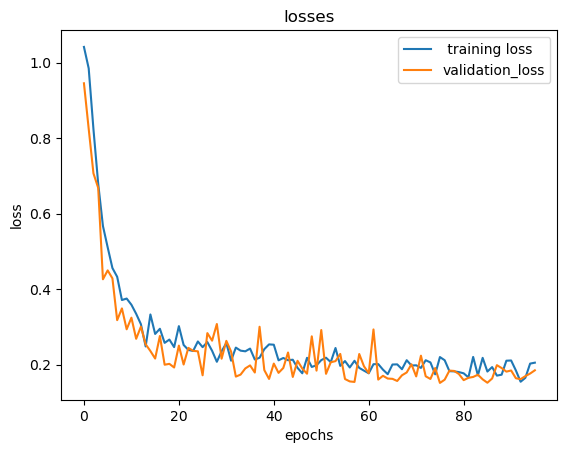

In [61]:
df.loc[:,['loss']]

plt.plot(df.loc[:,['loss']],label=' training loss')
plt.plot(df.loc[:,['val_loss']],label='validation_loss')
plt.legend(loc='best')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('losses')

<Axes: >

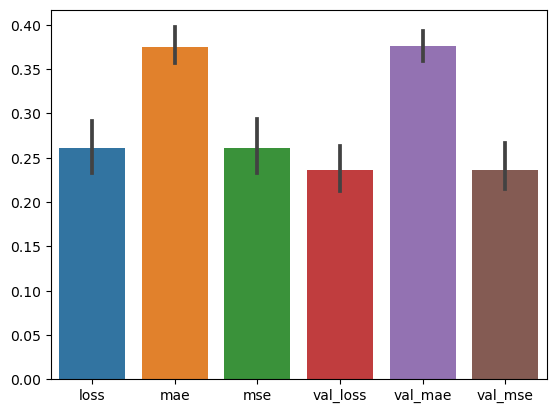

In [62]:
sns.barplot(df)